In [13]:
from google.colab import files
files = files.upload()

Saving image.jpg to image (1).jpg


In [14]:
import numpy as np
import imageio
from IPython.display import display, Image

image = Image("image.jpg")
display(image)

img_matrix = imageio.imread("image.jpg")
print(img_matrix.shape)
print(img_matrix)



(30, 30)
[[ 98  89  78 112  90  93 158 112 122 117 107 121  90  75  67  93  73  67
   96 152 167 151 166 154 134 105  53  51  55  44]
 [ 34  31  51  38  16  50 195 161 138 173 200 209 194 206 222 237 223 195
  177 185 167 160 166 169 136  98  49  54  55  35]
 [ 78  84  94  71  81  69 190 204 233 240 249 234 232 241 250 235 235 236
  224 194 169 181 170 162 121  95  55  49  52  47]
 [ 79  58  90 127 103 137 253 244 254 222 223 219 235 228 232 206 201 215
  201 106 105 137 169 173 124  81  45  49  59  53]
 [ 31  75  44  81  89 191 242 255 228 208 231 233 236 222 227 199 177 192
  208 104 137 109 170 194 159  88  44  54  63  46]
 [ 85  66  51 145 129 225 239 206 242 233 247 231 210 218 232 202 190 173
  181  95 146  39 132 199 178 145 103  53  44  65]
 [ 81  60  76 178 216 214 209 230 240 229 230 211 157 176 214 218 185 186
  198 154 203  33 100 157 157 179 162  72  39  78]
 [104  89 152 176 168 117 182 226 242 235 238 207  82  50  94 145 136 157
  148 119 175  30 111 165 136 155 168 110 

[[ 134.   37.   98.  195.  173. -221.    5.  137.    3.  -62.  -87.  -39.
   -92. -128. -175. -152.  -77.   -8.  -50.   13.   25.    1.  -58.  -22.
    -7.   64.  -12.  -24.]
 [ -75.  -80.   56.  -65.  182.  -39.   12.  -96.  -83.  -99.  -27.  -24.
   -48.  -70.  -12.  -45.  -75.  -88.  -92.  -29.  -88.   -2.  -15.   33.
   -25.   18.   14.    2.]
 [  96.  -37. -163.   22.   68. -199.  -10.  -89.   37.   29.   49.  -25.
    18.  -17.   43.   29.  -30.  -51.  180.  129.   16.  -26.  -43.   38.
    28.   49.   11.  -19.]
 [-101.  121.   81.  148.  -71.  -30. -100.   47.   82.  -13.  -15.  -44.
    21.  -23.   16.   74.    5. -154.  130.  -84.   47.  -76.  -75.  -52.
    77.  114.   -7.  -49.]
 [   7.  127. -141.  159. -127.  -74.  142.  -61.   -6.  -63.  -23.    2.
   -32.  -67.   31.  -23.   57.  -50.  205. -110.  264.  -20. -135.  -52.
   -32.   -8.   61.   44.]
 [  72.  137.  -99. -175.  -89.   29.  -39.  -17.   22.    5.  -19.   51.
   -65. -136. -126.  -10.  -31. -123.   -1. -304.  

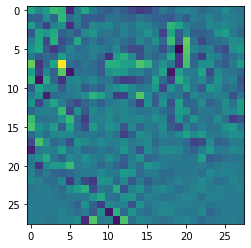

In [15]:
from matplotlib import pyplot as plt

def convolve2D(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))

    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    
    imagePadded = image

    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

convolution_filter = np.array([[0,1,0],
                             [1,-4,1], 
                             [0,1,0]])
output = convolve2D(img_matrix, convolution_filter, padding=0)

print(output[0:10])
print(output.shape)
plt.imshow(output)



[[ 134.   98.  173.    5.    3.  -87.  -92. -175.  -77.  -50.   25.  -58.
    -7.  -12.]
 [  96. -163.   68.  -10.   37.   49.   18.   43.  -30.  180.   16.  -43.
    28.   11.]
 [   7. -141. -127.  142.   -6.  -23.  -32.   31.   57.  205.  264. -135.
   -32.   61.]
 [  -1.  -46.  109.  -13.   11. -195.  159. -120.  -63.  143.  229. -165.
     8.  -27.]
 [ 106.   49.  241.  -26.  -33.   69.   84.   24.   13. -258.   -3.  125.
    40.  -22.]
 [ -79.   41.  -89.   18.  -31.   26.  103.  -10.   81.   77.  106.  -88.
    51.  -19.]
 [  76.   24.   15. -144.  -18.   -6.   36. -164.  -80. -120.  -65.   45.
   -33.  -32.]
 [ 196.  -18.   71.  -43.   20.   50.   42.   50.   59. -111.  -45.  -15.
    58. -169.]
 [ -38.  -43.   48.   -9.   -5.   26. -164.   61.  -16.   -5.  126.   96.
    -8.   71.]
 [-234.   26.  110.   29.  -39.  -31.   86. -111.  -10.   60.  -27.   15.
     1.   44.]]
(14, 14)


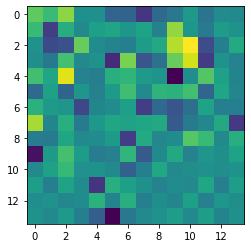

In [16]:
def convolve2D(image, kernel, padding=0, strides=2):
    kernel = np.flipud(np.fliplr(kernel))

    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    imagePadded = image

    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[int(x/strides), int(y/strides)] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

convolution_filter = np.array([[0,1,0],
                             [1,-4,1], 
                             [0,1,0]])
output = convolve2D(img_matrix, convolution_filter, padding=0, strides=2)

print(output[0:10])
print(output.shape)
plt.imshow(output)




[[ 98 112  93 195 173 209 206 237 223 185 167 169 136  54  55]
 [ 84 127 137 253 254 249 241 250 236 224 181 173 124  55  59]
 [ 85 145 225 255 242 247 236 232 192 208 146 199 178 103  65]
 [104 178 216 230 242 238 176 218 186 198 203 165 179 168  78]
 [ 95 186 147 248 242 221  62  74  95 182 155  91 145 161 116]
 [201 201 229 217 210 188 169 164 111 154  81 104 104 141 158]
 [184 212 180 214 193 148 191 141 127 140 114 113 115 139 102]
 [172 105  61 149 189 119 106 120 109 148  95 110 102 110  94]
 [186  41  34 104 153  91 172 147  98 143 136  92  83  37  87]
 [207  94  42  75  95  99 104 120 101  94 116 149  83  64  42]]
(15, 15)


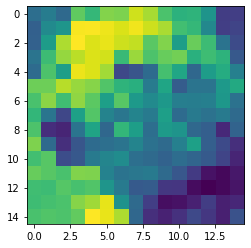

In [17]:
def maxPool(arr):
  arrShapeX, arrShapeY = arr.shape
  maxPoolX = 2
  maxPoolY = 2
  poolX = arrShapeX // maxPoolX
  poolY = arrShapeY // maxPoolY
  pool_result = arr[:poolX*maxPoolX, :poolY*maxPoolY].reshape(poolX, maxPoolX, poolY, maxPoolY).max(axis=(1, 3))
  return pool_result

output = maxPool(img_matrix)
print(output[0:10])
print(output.shape)
plt.imshow(output)

In [18]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


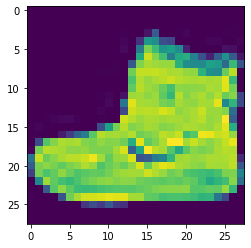

In [20]:
import tensorflow as tf
from keras.datasets import fashion_mnist
tf.keras.datasets.fashion_mnist.load_data()

num_classes = 10
input_shape = (32, 32, 1)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

plt.imshow(x_train[0])
plt.show

x_train = x_train.reshape([-1,28, 28, 1])
x_test = x_test.reshape([-1,28, 28, 1])

x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
from tensorflow.keras import regularizers
keras.backend.clear_session()

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(16, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(120, kernel_regularizer=regularizers.l2(4e-5), activation = "relu"),
        layers.Dense(84, kernel_regularizer=regularizers.l2(4e-5), activation = "relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [22]:
batch_size = 64
epochs = 10
sgd = keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
844/844 [==============================] - 35s 40ms/step - loss: 1.0242 - accuracy: 0.6408 - val_loss: 0.6603 - val_accuracy: 0.7633
Epoch 2/10
844/844 [==============================] - 33s 39ms/step - loss: 0.6240 - accuracy: 0.7747 - val_loss: 0.5569 - val_accuracy: 0.8048
Epoch 3/10
844/844 [==============================] - 33s 39ms/step - loss: 0.5433 - accuracy: 0.8055 - val_loss: 0.5738 - val_accuracy: 0.7827
Epoch 4/10
844/844 [==============================] - 33s 39ms/step - loss: 0.4957 - accuracy: 0.8247 - val_loss: 0.4817 - val_accuracy: 0.8313
Epoch 5/10
844/844 [==============================] - 33s 39ms/step - loss: 0.4635 - accuracy: 0.8365 - val_loss: 0.4419 - val_accuracy: 0.8477
Epoch 6/10
844/844 [==============================] - 33s 39ms/step - loss: 0.4395 - accuracy: 0.8462 - val_loss: 0.4598 - val_accuracy: 0.8393
Epoch 7/10
844/844 [==============================] - 33s 40ms/step - loss: 0.4192 - accuracy: 0.8521 - val_loss: 0.4365 - val_accuracy:

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.40736931562423706
Test accuracy: 0.8580999970436096


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


422/422 [==============================] - 29s 68ms/step - loss: 1.4596 - accuracy: 0.4809 - val_loss: 0.7668 - val_accuracy: 0.7250
Epoch 2/10
422/422 [==============================] - 29s 69ms/step - loss: 0.7583 - accuracy: 0.7184 - val_loss: 0.6640 - val_accuracy: 0.7507
Epoch 3/10
422/422 [==============================] - 28s 67ms/step - loss: 0.6621 - accuracy: 0.7587 - val_loss: 0.6567 - val_accuracy: 0.7455
Epoch 4/10
422/422 [==============================] - 28s 66ms/step - loss: 0.6030 - accuracy: 0.7834 - val_loss: 0.5647 - val_accuracy: 0.8057
Epoch 5/10
422/422 [==============================] - 28s 67ms/step - loss: 0.5619 - accuracy: 0.7999 - val_loss: 0.5609 - val_accuracy: 0.8027
Epoch 6/10
422/422 [==============================] - 28s 66ms/step - loss: 0.5295 - accuracy: 0.8129 - val_loss: 0.5289 - val_accuracy: 0.8122
Epoch 7/10
422/422 [==============================] - 28s 66ms/step - loss: 0.5030 - accuracy: 0.8238 - val_loss: 0.5056 - val_accuracy: 0.8265
Epo

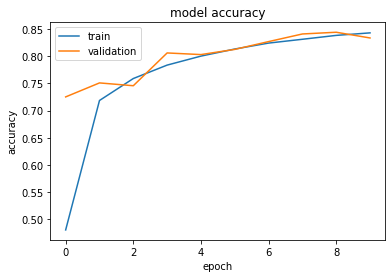

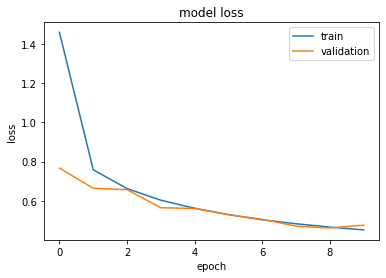

In [24]:
keras.backend.clear_session()

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(16, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(120, kernel_regularizer=regularizers.l2(4e-5), activation = "relu"),
        layers.Dense(84, kernel_regularizer=regularizers.l2(4e-5), activation = "relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 10
sgd = keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


844/844 [==============================] - 34s 40ms/step - loss: 0.5774 - accuracy: 0.7937 - val_loss: 0.4287 - val_accuracy: 0.8468
Epoch 2/10
844/844 [==============================] - 33s 39ms/step - loss: 0.3854 - accuracy: 0.8638 - val_loss: 0.3731 - val_accuracy: 0.8690
Epoch 3/10
844/844 [==============================] - 33s 39ms/step - loss: 0.3371 - accuracy: 0.8820 - val_loss: 0.3629 - val_accuracy: 0.8718
Epoch 4/10
844/844 [==============================] - 33s 39ms/step - loss: 0.3092 - accuracy: 0.8927 - val_loss: 0.3245 - val_accuracy: 0.8885
Epoch 5/10
844/844 [==============================] - 33s 39ms/step - loss: 0.2905 - accuracy: 0.8979 - val_loss: 0.3172 - val_accuracy: 0.8910
Epoch 6/10
844/844 [==============================] - 33s 39ms/step - loss: 0.2752 - accuracy: 0.9048 - val_loss: 0.3060 - val_accuracy: 0.8943
Epoch 7/10
844/844 [==============================] - 33s 39ms/step - loss: 0.2634 - accuracy: 0.9090 - val_loss: 0.3072 - val_accuracy: 0.8950
Epo

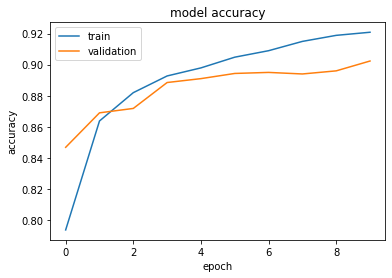

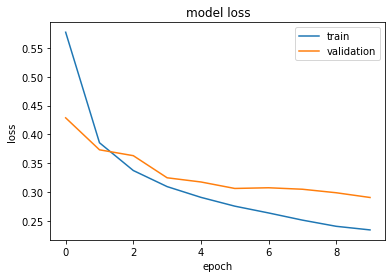

In [25]:
keras.backend.clear_session()

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(16, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(120, kernel_regularizer=regularizers.l2(4e-5), activation = "relu"),
        layers.Dense(84, kernel_regularizer=regularizers.l2(4e-5), activation = "relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


batch_size = 64
epochs = 10
sgd = keras.optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


844/844 [==============================] - 34s 39ms/step - loss: 1.2651 - accuracy: 0.5773 - val_loss: 0.7204 - val_accuracy: 0.7288
Epoch 2/10
844/844 [==============================] - 33s 39ms/step - loss: 0.6129 - accuracy: 0.7738 - val_loss: 0.5487 - val_accuracy: 0.7998
Epoch 3/10
844/844 [==============================] - 33s 39ms/step - loss: 0.5223 - accuracy: 0.8106 - val_loss: 0.4984 - val_accuracy: 0.8197
Epoch 4/10
844/844 [==============================] - 33s 39ms/step - loss: 0.4713 - accuracy: 0.8334 - val_loss: 0.4655 - val_accuracy: 0.8355
Epoch 5/10
844/844 [==============================] - 33s 39ms/step - loss: 0.4374 - accuracy: 0.8456 - val_loss: 0.4268 - val_accuracy: 0.8475
Epoch 6/10
844/844 [==============================] - 33s 40ms/step - loss: 0.4129 - accuracy: 0.8549 - val_loss: 0.4132 - val_accuracy: 0.8577
Epoch 7/10
844/844 [==============================] - 33s 40ms/step - loss: 0.3936 - accuracy: 0.8619 - val_loss: 0.3917 - val_accuracy: 0.8620
Epo

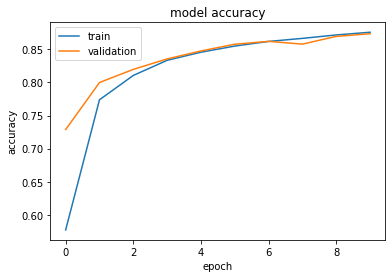

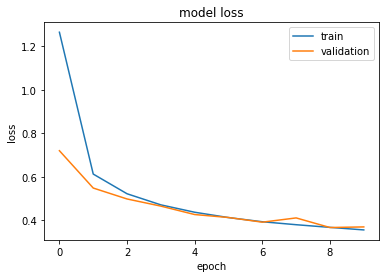

In [26]:
keras.backend.clear_session()

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(6, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(16, kernel_size=(5,5), kernel_regularizer=regularizers.l2(4e-5), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(120, kernel_regularizer=regularizers.l2(4e-5), activation = "relu"),
        layers.Dense(84, kernel_regularizer=regularizers.l2(4e-5), activation = "relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

batch_size = 64
epochs = 10
sgd = keras.optimizers.SGD(lr=0.05, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()